
# Stock Price Analysis & Technical Visualization

**Goal:** Melakukan analisis harga saham dengan pendekatan teknikal yang jelas dan storytelling yang mudah dipahami oleh pembaca non-teknis.

**Data:** Menggunakan data historis saham (HDFC Bank) selama 2 tahun.

**Output Utama:**
- Visualisasi tren harga
- Indikator teknikal populer (SMA, EMA, RSI, MACD, Bollinger Bands)
- Insight beli/jual berdasarkan indikator


# Import Library

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# Load Data

In [10]:

# Load data
df = pd.read_csv("C:/Users/LENOVO/Python/HDFCBANK.NS.csv")

# Konversi kolom Date
df['Date'] = pd.to_datetime(df['Date'])

# Urutkan data
df = df.sort_values('Date')

# Periksa info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       491 non-null    datetime64[ns]
 1   Open       490 non-null    float64       
 2   High       490 non-null    float64       
 3   Low        490 non-null    float64       
 4   Close      490 non-null    float64       
 5   Adj Close  490 non-null    float64       
 6   Volume     490 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 27.0 KB


# Eksplorasi Awal Data

In [11]:

# Lihat data awal
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-15,944.849976,947.375000,937.500000,940.950012,927.139465,2457612.0
1,2018-02-16,941.950012,947.424988,937.825012,939.299988,925.513611,1791760.0
2,2018-02-19,941.299988,943.799988,929.525024,939.099976,925.316528,1827276.0
3,2018-02-20,942.375000,942.924988,929.400024,931.599976,917.926697,2042034.0
4,2018-02-21,933.974976,934.275024,926.099976,928.700012,915.069214,1376536.0


# Plot harga penutupan

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'))
fig.update_layout(title='Tren Harga Saham', xaxis_title='Date', yaxis_title='Price')
fig.show()


## Interpretasi
1. Fase Awal 2018 (awal tren naik)
   * Harga dimulai di kisaran 930–950 dan bergerak naik secara bertahap.
   * Ada sedikit volatilitas, tetapi arah tren cenderung positif hingga pertengahan 2018.
2. Pertengahan 2018 – Awal 2019 (koreksi dan konsolidasi)
   * Setelah mencapai sekitar 1100 di pertengahan 2018, harga mengalami penurunan ke bawah 1000 di akhir 2018.
   * Pola ini mengindikasikan fase koreksi pasar setelah kenaikan sebelumnya.
3. Awal 2019 – Pertengahan 2019 (pemulihan & lonjakan)
   * Harga mulai pulih pada awal 2019 dan naik pesat pada kuartal kedua, menembus 1200.
   * Lonjakan ini kemungkinan dipicu oleh sentimen positif atau rilis fundamental yang kuat.
4. Pertengahan 2019 – Akhir 2019 (volatilitas tinggi)
   * Terjadi fluktuasi besar: harga turun dari sekitar 1220 menjadi sekitar 1100, lalu kembali naik ke level tertinggi mendekati 1300.
   * Fase ini menunjukkan banyak aksi beli-jual cepat, mungkin karena berita atau faktor eksternal.
5. Akhir 2019 – Awal 2020 (tekanan jual ringan)
   * Setelah mencapai puncak, harga sedikit menurun tetapi masih berada di level tinggi (sekitar 1220–1250).
   * Penurunan ini belum mengubah tren besar yang masih cenderung naik dibanding awal 2018.
6. Kesimpulan
   * Dalam rentang waktu hampir dua tahun, harga saham mengalami kenaikan signifikan dari sekitar 950 ke lebih dari 1200, atau sekitar +26% secara nominal.
   * Meskipun terdapat periode koreksi, tren jangka panjang tetap positif.
   * Volatilitas meningkat pada 2019, menandakan pasar mulai bergerak lebih dinamis dan sensitif terhadap berita.

# Analisis Teknikal

## SMA & EMA
1. SMA (Simple Moving Average)
- Deskripsi\
  SMA adalah metode rata-rata bergerak yang menghitung nilai rata-rata dari sejumlah data terakhir dalam periode tertentu, dengan bobot yang sama untuk setiap titik data.
- Tujuan
  - Menyaring fluktuasi kecil (noise) agar tren besar terlihat jelas.
  - Memberikan gambaran umum arah pergerakan data (naik, turun, atau datar).
  - Membantu analisis teknikal dalam menentukan area support dan resistance.
2. EMA (Exponential Moving Average)
- Deskripsi\
  EMA adalah metode rata-rata bergerak yang memberi bobot lebih besar pada data terbaru, sehingga lebih responsif terhadap perubahan terkini dibanding SMA.
- Tujuan
  - Mendeteksi perubahan tren lebih cepat.
  - Memberikan sinyal beli/jual lebih dini pada analisis pasar.
  - Cocok untuk memantau pergerakan data jangka pendek.

In [13]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], name='SMA20'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA50'], name='EMA50'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA200'], name='EMA200'))
fig.update_layout(title='SMA & EMA', xaxis_title='Date', yaxis_title='Price')
fig.show()


### Keterangan
* SMA20 (merah) → Simple Moving Average periode 20 hari
* EMA50 (hijau) → Exponential Moving Average periode 50 hari
* EMA200 (ungu) → Exponential Moving Average periode 200 hari
* Garis biru adalah harga penutupan harian (Close).
### Fungsi Masing-masing Garis
* SMA20 (merah): Menghaluskan harga dalam jangka pendek (sekitar 1 bulan trading), peka terhadap perubahan cepat.
* EMA50 (hijau): Indikator jangka menengah, lebih halus daripada SMA20 tetapi tetap cukup peka.
* EMA200 (ungu): Indikator tren jangka panjang (~1 tahun), bergerak sangat lambat, dipakai untuk melihat tren besar.
### Interpretasi Periode Waktu
1. Awal 2018 – Pertengahan 2018
    * Harga (Close) berada di atas semua garis MA → tren naik kuat.
    * SMA20 sering memotong EMA50 dari bawah → sinyal beli.
2. Pertengahan 2018 – Awal 2019
    * Harga sering memotong SMA20 dan EMA50 → volatilitas tinggi, tren tidak stabil.
    * Beberapa kali SMA20 memotong EMA50 dari atas (death cross) → sinyal jual.
3. Awal 2019 – Pertengahan 2019
    * Harga kembali di atas semua MA → tren naik kembali.
    * Jarak antara garis harga dan EMA200 melebar → momentum bullish kuat.
4. Akhir 2019 – Awal 2020
    * Harga mulai melemah, SMA20 memotong EMA50 dari atas → potensi pembalikan tren ke bearish.
### Sinyal Teknis yang Terlihat
* Golden Cross (SMA20/EMA50 memotong ke atas EMA200) biasanya terjadi di awal 2019 → tanda tren naik besar.
* Death Cross (SMA20 memotong ke bawah EMA50 atau EMA200) muncul akhir 2019 → tanda potensi turun.
### Kesimpulan
* Garis EMA200 bisa dianggap sebagai “garis batas” tren utama: harga di atasnya = tren naik, di bawahnya = tren turun.
* Pada grafik ini, tren besar tetap naik selama 2018–2019, tapi akhir 2019 muncul tanda pelemahan.
* Trader jangka pendek akan lebih fokus pada persilangan SMA20 dan EMA50.
* Investor jangka panjang akan melihat jarak harga terhadap EMA200 untuk memutuskan posisi.

## RSI (Relative Strength Index)
- Deskripsi\
  RSI adalah indikator momentum yang mengukur kecepatan dan besarnya perubahan harga dalam suatu periode tertentu (biasanya 14 hari). Nilainya berkisar antara 0 hingga 100, di mana angka tinggi menunjukkan tekanan beli yang kuat, dan angka rendah menunjukkan tekanan jual yang kuat.
- Tujuan
  - Mengidentifikasi kondisi overbought (jenuh beli, biasanya >70) dan oversold (jenuh jual, biasanya <30).
  - Membantu menentukan potensi pembalikan arah (reversal) atau kelanjutan tren.
  - Digunakan untuk mengukur kekuatan tren saat ini.

In [14]:
delta = df['Close'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], name='RSI'))
fig.add_hline(y=70, line_dash="dot", line_color="red")
fig.add_hline(y=30, line_dash="dot", line_color="green")
fig.update_layout(title='RSI (Relative Strength Index)', xaxis_title='Date', yaxis_title='RSI')
fig.show()


### Pemahaman Dasar RSI pada Grafik
* RSI (Relative Strength Index) adalah indikator teknikal yang mengukur kekuatan relatif pergerakan harga, biasanya untuk mengidentifikasi apakah aset berada pada kondisi overbought (jenuh beli) atau oversold (jenuh jual).
* Garis horizontal merah (sekitar level 70) → batas atas zona overbought.
* Garis horizontal hijau (sekitar level 30) → batas bawah zona oversold.
* Skala RSI berjalan dari 0 sampai 100.
### Interpretasi Umum Grafik
* Overbought (>70) → Muncul beberapa kali, contohnya pada pertengahan 2018, awal 2019, dan pertengahan 2019. Biasanya diikuti oleh koreksi harga ke bawah.
* Oversold (<30) → Terlihat di akhir 2018, pertengahan 2019, dan awal 2020. Setelah titik ini, harga sering berbalik naik.
* Zona tengah (30–70) → Harga bergerak normal tanpa indikasi jenuh beli/jual yang ekstrem.
### Pola Penting
* Mid-2018 & Mid-2019 → RSI menyentuh >80 (sangat overbought) dan kemudian mengalami penurunan tajam.
* Akhir 2018 & Awal 2020 → RSI turun di bawah 20 (sangat oversold) diikuti rebound signifikan.
* Fluktuasi RSI terlihat cukup sering menyentuh area ekstrim, artinya aset ini cukup volatil dan sering mengalami perubahan tren jangka pendek.
### Implikasi Trading
* Sinyal beli potensial: Saat RSI <30 dan mulai naik → contoh akhir 2018, awal 2020.
* Sinyal jual potensial: Saat RSI >70 dan mulai turun → contoh pertengahan 2018, pertengahan 2019.
* Namun, pada pasar yang sedang tren kuat, RSI bisa tetap di area ekstrim lebih lama (overbought tidak selalu berarti harga langsung turun).

## MACD (Moving Average Convergence Divergence)
1. Deskripsi
    - MACD adalah indikator teknikal yang membantu trader melihat arah tren harga dan kekuatan pergerakannya.
    - Indikator ini bekerja dengan membandingkan dua garis rata-rata bergerak (moving average) yang punya kecepatan berbeda:
        - EMA Cepat (12 periode) → lebih responsif terhadap perubahan harga.
        - EMA Lambat (26 periode) → lebih stabil dan lambat mengikuti harga.
    - Selisih antara keduanya disebut MACD Line.
    - Kemudian, dibuat garis kedua yaitu Signal Line (rata-rata dari MACD Line, biasanya 9 periode) untuk memberi sinyal kapan tren mulai berubah.
2. Tujuan
    - Menentukan arah tren → Apakah pasar sedang naik (bullish) atau turun (bearish).
    - Memberi sinyal beli/jual → Melihat titik perpotongan antara MACD Line dan Signal Line.
    - Mengukur kekuatan tren → Lewat lebar dan tinggi histogram.

In [15]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['MACD'], name='MACD'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Signal'], name='Signal'))
fig.update_layout(title='MACD', xaxis_title='Date', yaxis_title='Value')
fig.show()


### Garis Biru (MACD)
* Menggambarkan selisih antara EMA jangka pendek dan EMA jangka panjang dari harga.
* Jika nilai positif → tren jangka pendek lebih kuat dari tren jangka panjang (bullish).
* Jika nilai negatif → tren jangka pendek lebih lemah dari tren jangka panjang (bearish).
### Garis Merah (Signal)
* Merupakan EMA dari garis MACD.
* Digunakan sebagai acuan kapan terjadi sinyal beli/jual.
### Persilangan (Crossovers)
* MACD memotong ke atas Signal → sinyal beli (tren naik mulai menguat).
* MACD memotong ke bawah Signal → sinyal jual (tren turun mulai menguat).
* Contoh pada grafik: sekitar April 2019 dan Oktober 2019 terlihat crossover ke atas → harga kemungkinan naik sesudahnya.
### Jarak antara MACD dan Signal (Divergence)
* Semakin jauh jaraknya → tren sedang kuat (bisa bullish atau bearish tergantung arah).
* Semakin dekat atau sering silang → tren sedang lemah atau sideways.
### Level nol (0 line)
* Saat MACD melintasi garis nol → konfirmasi perubahan tren jangka panjang.
* Contoh: Oktober 2018 turun ke bawah nol → awal tren turun signifikan.

## Bollinger Bands
1. Deskripsi
    - Bollinger Bands adalah indikator teknikal yang terdiri dari tiga garis:
        - Middle Band → Simple Moving Average (SMA) biasanya 20 periode.
        - Upper Band → Middle Band + (deviasi standar × faktor, biasanya 2).
        - Lower Band → Middle Band − (deviasi standar × faktor, biasanya 2).
    - Upper dan Lower Band membentuk “selimut” yang mengikuti pergerakan harga, sehingga lebar atau sempitnya selimut ini menandakan volatilitas (tingkat perubahan harga) di pasar.
2. Tujuan
    - Mengukur volatilitas pasar → Band melebar = pasar sedang aktif, band menyempit = pasar sedang tenang.
    - Menentukan potensi titik beli/jual → Harga yang menyentuh atau melewati upper/lower band sering menjadi sinyal pembalikan arah.
    - Mengidentifikasi fase konsolidasi → Band yang sempit menandakan harga sedang “mengumpulkan tenaga” untuk bergerak besar.

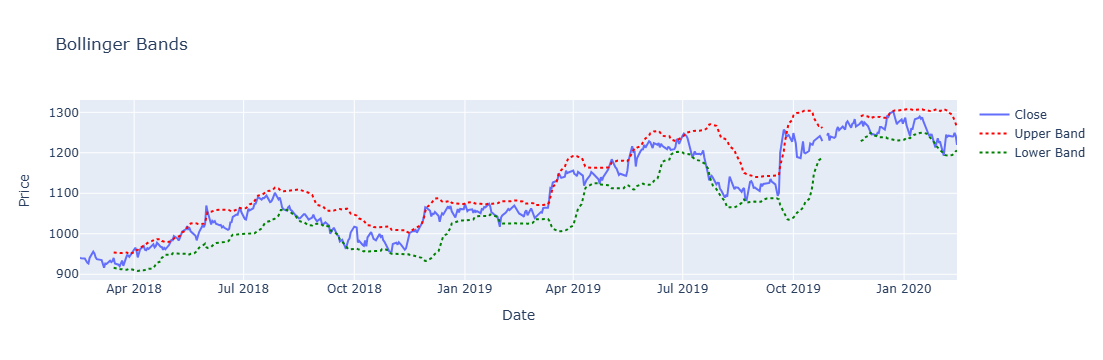

In [16]:
df['MiddleBand'] = df['Close'].rolling(window=20).mean()
df['UpperBand'] = df['MiddleBand'] + 2*df['Close'].rolling(window=20).std()
df['LowerBand'] = df['MiddleBand'] - 2*df['Close'].rolling(window=20).std()

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['UpperBand'], name='Upper Band', line=dict(color='red', dash='dot')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['LowerBand'], name='Lower Band', line=dict(color='green', dash='dot')))
fig.update_layout(title='Bollinger Bands', xaxis_title='Date', yaxis_title='Price')
fig.show()


### Komponen Grafik
* Garis biru = Harga penutupan aktual (Close).
* Garis merah putus-putus = Upper Band (batas atas).
* Garis hijau putus-putus = Lower Band (batas bawah).
* Middle band = Simple Moving Average (SMA) dari harga penutupan.
* Upper band = SMA + (2 × standar deviasi).
* Lower band = SMA − (2 × standar deviasi).
### Interpretasi Pola
* Periode pelebaran band
  Terlihat saat volatilitas tinggi, misalnya di sekitar Apr 2019 dan Sep 2019, jarak antara Upper dan Lower Band melebar. Ini menandakan pasar sedang aktif bergerak dengan fluktuasi besar.
* Periode penyempitan band
  Terjadi sekitar Okt 2018 dan awal 2019, jarak Upper–Lower Band sempit. Ini biasanya menandakan fase konsolidasi (harga bergerak datar) sebelum breakout.
* Harga menyentuh Upper Band
  Terlihat di Jul 2018, Jun 2019, dan Okt 2019, harga mendekati atau menyentuh batas atas. Ini sering diartikan sebagai area overbought (potensi koreksi).
* Harga menyentuh Lower Band
  Terjadi di Okt 2018, Des 2018, dan Sep 2019, yang sering diartikan sebagai area oversold (potensi rebound).
### Kesimpulan Umum
* Bollinger Bands efektif di sini untuk menunjukkan kapan harga terlalu tinggi atau rendah secara relatif.
* Breakout sering didahului oleh penyempitan band, lalu pelebaran cepat.
* Perlu kombinasi indikator lain (misalnya RSI atau MACD) untuk konfirmasi sinyal beli/jual.

# Kesimpulan Analisis Indikator Teknis
1. SMA & EMA → Memberikan gambaran tren jangka pendek dan jangka panjang.
    - Simpulan: Tren harga bisa dikenali dan dikonfirmasi (apakah naik, turun, atau sideways).
    - Manfaat praktis: Membantu menentukan momen ikuti tren (trend-following).
2. RSI → Mengukur kekuatan momentum harga.
    - Simpulan: Kita bisa mengetahui apakah harga sedang terlalu tinggi (overbought) atau terlalu rendah (oversold).
    - Manfaat praktis: Memberi sinyal potensi pembalikan harga atau koreksi.
3. MACD → Menggabungkan tren dan momentum.
    - Simpulan: Menunjukkan kapan momentum tren berubah arah.
    - Manfaat praktis: Berguna untuk mendeteksi titik masuk (buy) dan keluar (sell) lebih awal.
4. Bollinger Bands → Mengukur volatilitas harga.
    - Simpulan: Lebar band = tingkat aktivitas harga; harga yang mendekati batas atas/bawah memberi sinyal potensi pembalikan.
    - Manfaat praktis: Mengantisipasi pergerakan besar setelah periode tenang (squeeze) atau menghindari membeli/menjual di harga ekstrem.

